# Machine learning - Binary Classification (Heart disease)

- Created by: Harmohat Khangura
- Date: 10/03/2023
- Version: 1.0

**overview**

- 1 What is the problem?
- 2 Prediction
- 3 Get the data
  - 3.1 Importing the 'Heart disease' dataset
  - 3.2 Printing data information
- 4 Visualize data 
- 5 Clean and prepare data
  - 5.1 Replace the string value with numerical values
  - 5.2 Reshaping the columns for the OneHotEncoder in the next step
  - 5.3 Using the `OneHotEncoder` for the categorical labels
  - 5.4 moving target column to last
  - 5.5 Split Data into Train, Test
- 6 RP Visualize data 
  - 6.1 Subplots
  - 6.2 Subplots: Only shows sub plots where target = 1
  - 6.3 Correlation matrix 
  - 6.4 Heatmap
- 7-`LR` Select and set model
- 7-`RF` Select and set model
- 8-`LR` Train and test model
- 8-`RF` Train and test model
- 9 Improve model
  - 9.1 Logistic Regression
  - 9.2 Random forest
- 10-`LR` Evaluate results
  - 10.1-`LR` Accuracy score
  - 10.2-`LR` Precision score
  - 10.3-`LR` Recall score
  - 10.4-`LR` Confusion matrix
- 10-`RF` Evaluate results
  - 10.1-`RF` Accuracy score
  - 10.2-`RF` Precision score
  - 10.3-`RF` Recall score
  - 10.4-`RF` Cross validation
  - 10.5-`RF` Confusion matrix
- 11 Conclusion

<span style="color: red;font-weight:bold;">NOTE!</span>

`LR` =  Logistic Regression model <br>
`RF` = Random Forest model

## 1. What is the problem?

**Dataset:**

Binary Classification: Heart Disease UCI Dataset
  
The 'Heart Disease UCI' dataset contains data on patients with probable heart disease, where the target variable is whether a patient has heart disease or not.

The dimension of the dataset is a 2 dimensional array (array in array).

**Labels**

- Age: This is the age of the patient
- Sex: The gender of the patient
  - Male
  - Female
- Chest pain type: The type of chest pain of the patient
  - Typical Angina
  - Atypical Angina
  - None-anginal pain
  - Asymptomatic
- Resting blood pressure: pressure of the blood in the arteries when the body is at rest.
- Cholestoral: High levels of LDL cholesterol and low levels of HDL cholesterol are associated with an increased risk of heart disease and stroke
- Fasting blood sugar: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- Resting electrocardiographic results: the recording of the electrical activity of the heart while the patient is at rest.
  - ST-T wave abnormality
  - Normal
  - Left ventricular hypertrophy
- Max heart rate achieved
- Exercise induced angina: chest pain or discomfort that occurs during physical activity or exercise.
  - 1 = Yes
  - 0 = No
- Oldpeak: ST depression induced by exercise relative to rest
- Slope: the slope of the peak exercise ST segment
  - Upsloping
  - Flat
  - Downsloping
- Vessels colored by flourosopy: number of major vessels (0-3) colored by flourosopy
- Thalassemia: blood disorder 
  - Normal
  - Fixed Defect
  - Reversable Defect
- Target 
  - 0: No Heart disease
  - 1: Heart disease

## 2. Prediction

I think both Logistic Regression and Random Forest models are expected to perform well in predicting heart diseases but if i had to choose I would say that the Logistic Regression would perform well since the dataset does not have many columns of data. 

For Logistic Regression, important hyperparameters are regularization strength (C) and penalty type (L1 or L2). 

For Random Forest, important hyperparameters are the number of trees (n_estimators), maximum depth of each tree (max_depth)

---

Importing the libraries to use

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay  
from sklearn.model_selection import cross_val_score

## 3. Get the data

### 3.1 Importing the 'Heart disease' dataset

In [4]:
# Takes the path to the 'Heart disease' CSV file and reads the data into a Pandas DataFrame object
df = pd.read_csv(r'..\..\..\datasets\heart-disease\HeartDiseaseTrain-Test.csv')

# Shows the first n (10) rows for the object based on position
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
5,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1
6,58,Male,Typical angina,114,318,Lower than 120 mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,Three,Normal,0
7,55,Male,Typical angina,160,289,Lower than 120 mg/ml,Normal,145,Yes,0.8,Flat,One,Reversable Defect,0
8,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
9,54,Male,Typical angina,122,286,Lower than 120 mg/ml,Normal,116,Yes,3.2,Flat,Two,Fixed Defect,0


### 3.2 Printing data information

In [ ]:
# Printing the total amount of rows which are included in the dataset 
print(f"Total number of rows of data: {len(df)}")

# Printing the total amount of columns which are included in the dataset 
print(f"Total number of columns: {len(df.columns)}")

# Printing the total amount of rows and columns which are included in the dataset (shorter way)
print(f"Total number of rows and columns: {df.shape}")

# Printing the dimension of the dataset
print(f"The dimension of the data set: {df.ndim}\n")

# Printing the datatypes
print(df.dtypes)

Total number of rows of data: 1025
Total number of columns: 14
Total number of rows and columns: (1025, 14)
The dimension of the data set: 2

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object


Displays the columns where the data can contain 0 values

In [ ]:
# Loops through the columns
for column_name in df.columns:
    # Saves the column name
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()

    # Only displays the column and count if it contains 0 values
    if count > 0:
        print(f'{column_name} : {count}')

oldpeak : 329
target : 499


Checks for NaN values

In [ ]:
df.isna().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

Checks for null values

In [ ]:
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

What I have observed is that the columns `sex`, `chest_pain_type`, `rest_ecg`, `slope`, 
`vessels_colored_by_flourosopy` and `thalassemia` does contain categorical data.

The `exercise_induced_angina` column does contain the string values yes and no, which can be changed to 0 for no and 1 for yes.

I also read the explanation on kaggle for the column `fasting_blood_sugar`. So when the value is 'Greater than 120 mg/ml', I can change it to 1 (true). When the value is 'Lower than 120 mg/ml', I can change it to 0 (false).

## 4. Visualize data  

In [ ]:
def show_subplots(df, column_length):
    columns=df.columns[:column_length]
    plt.subplots(figsize=(20,20))
    length=len(columns)
    for i,j in itertools.zip_longest(columns,range(length)):
        plt.subplot(int(length/4), 5, j+1)
        plt.subplots_adjust(wspace=0.5,hspace=1)
        df[i].hist(bins=20,edgecolor='black')
        plt.title(i)
    plt.show()

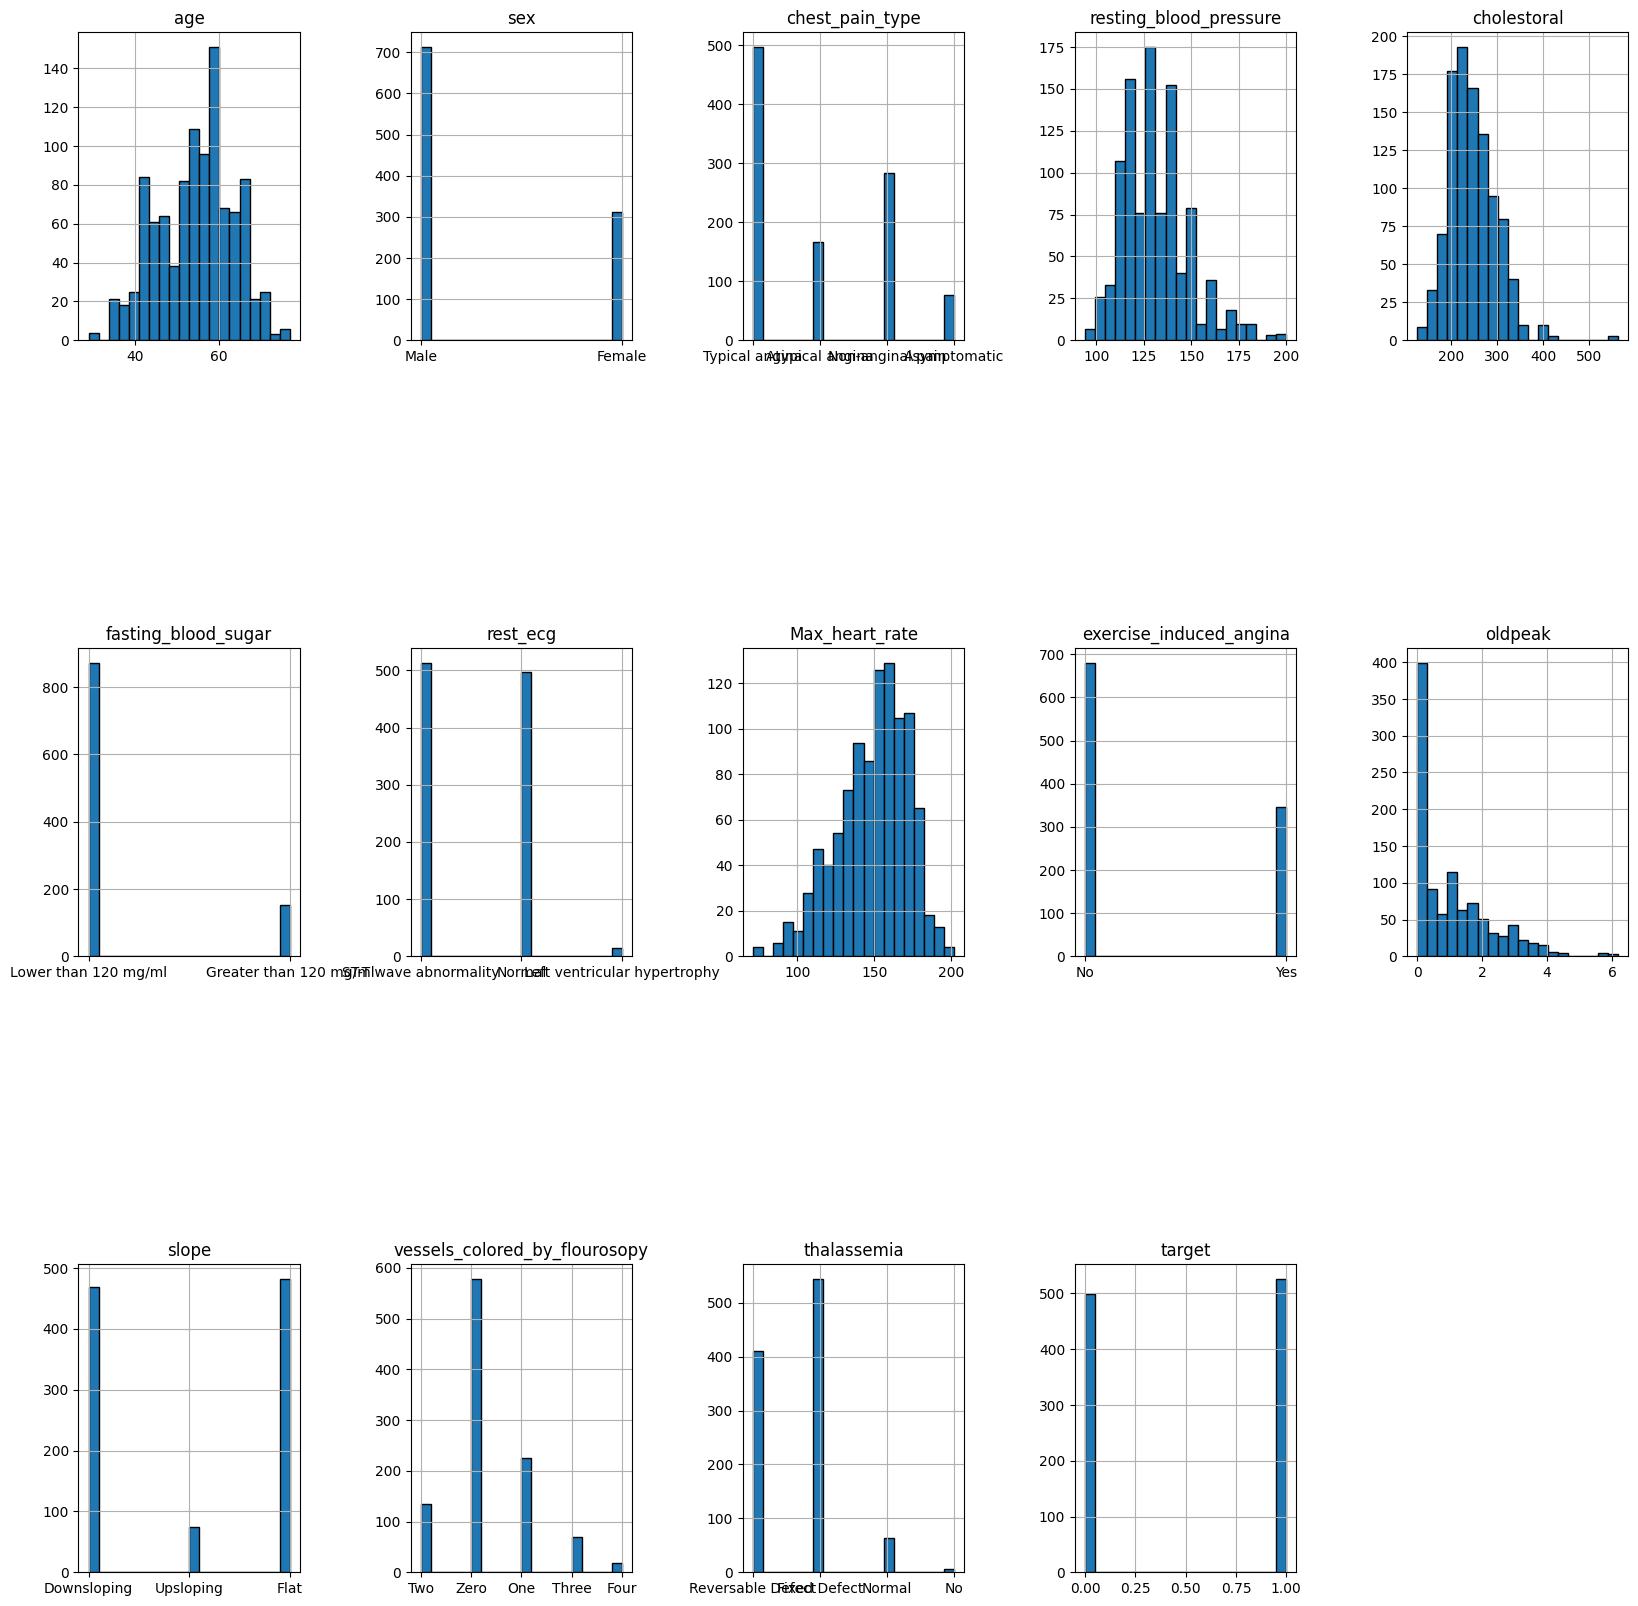

In [ ]:
show_subplots(df, len(df.columns))

## 5. Clean and prepare data

### 5.1 Replace the string value with numerical values

In [ ]:
# Replaces the string values 'No' and 'Yes' in the 'exercise_induced_angina' column with 0 and 1
df['exercise_induced_angina'].replace({'No': 0, 'Yes': 1},inplace = True)

# Replaces the string values 'Lower than 120 mg/ml' to 0 and 'Greater than 120 mg/ml' to 1
df['fasting_blood_sugar'].replace({'Lower than 120 mg/ml': 0, 'Greater than 120 mg/ml': 1},inplace = True)


### 5.2 Reshaping the columns for the OneHotEncoder in the next step

In [ ]:
# Reshapes the columns into a 2D array
cols = ['sex', 'chest_pain_type', 'rest_ecg', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
columns_reshaped_dict = {col: df[col].values.reshape(-1, 1) for col in cols}

### 5.3 Using the `OneHotEncoder` for the categorical labels

Categorical Labels:
- sex
- chest_pain_type
- rest_ecg
- slope
- vessels_colored_by_flourosopy
- thalassemia

In [ ]:
# Instantiate the OneHotEncoder class
ohe = OneHotEncoder()

df_encoded = pd.get_dummies(df, columns=columns_reshaped_dict.keys())

### 5.4 moving target column to last

In [ ]:
df_encoded = df_encoded.reindex(columns = [col for col in df_encoded.columns if col != 'target'] + ['target'])

In [ ]:
# Shows the first n (10) rows for the object based on position
df_encoded.head(10)

,age,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina,oldpeak,sex_Female,sex_Male,chest_pain_type_Asymptomatic,...,vessels_colored_by_flourosopy_Four,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_Fixed Defect,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,target
0,52,125,212,0,168,0,1.0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,53,140,203,1,155,1,3.1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,70,145,174,0,125,1,2.6,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,61,148,203,0,161,0,0.0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,62,138,294,1,106,0,1.9,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,58,100,248,0,122,0,1.0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
6,58,114,318,0,140,0,4.4,0,1,0,...,0,0,1,0,0,0,0,1,0,0
7,55,160,289,0,145,1,0.8,0,1,0,...,0,1,0,0,0,0,0,0,1,0
8,46,120,249,0,144,0,0.8,0,1,0,...,0,0,0,0,1,0,0,0,1,0
9,54,122,286,0,116,1,3.2,0,1,0,...,0,0,0,1,0,1,0,0,0,0


### 5.5 Split Data into Train, Test

In [ ]:
# Contains the features to train on
X = df_encoded.drop('target', axis=1)

# Contains the target variable
y = df_encoded["target"].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## 6. RP Visualize data 
    RP = repeating
    (repeating after cleaning and preparing data)

### 6.1 Subplots

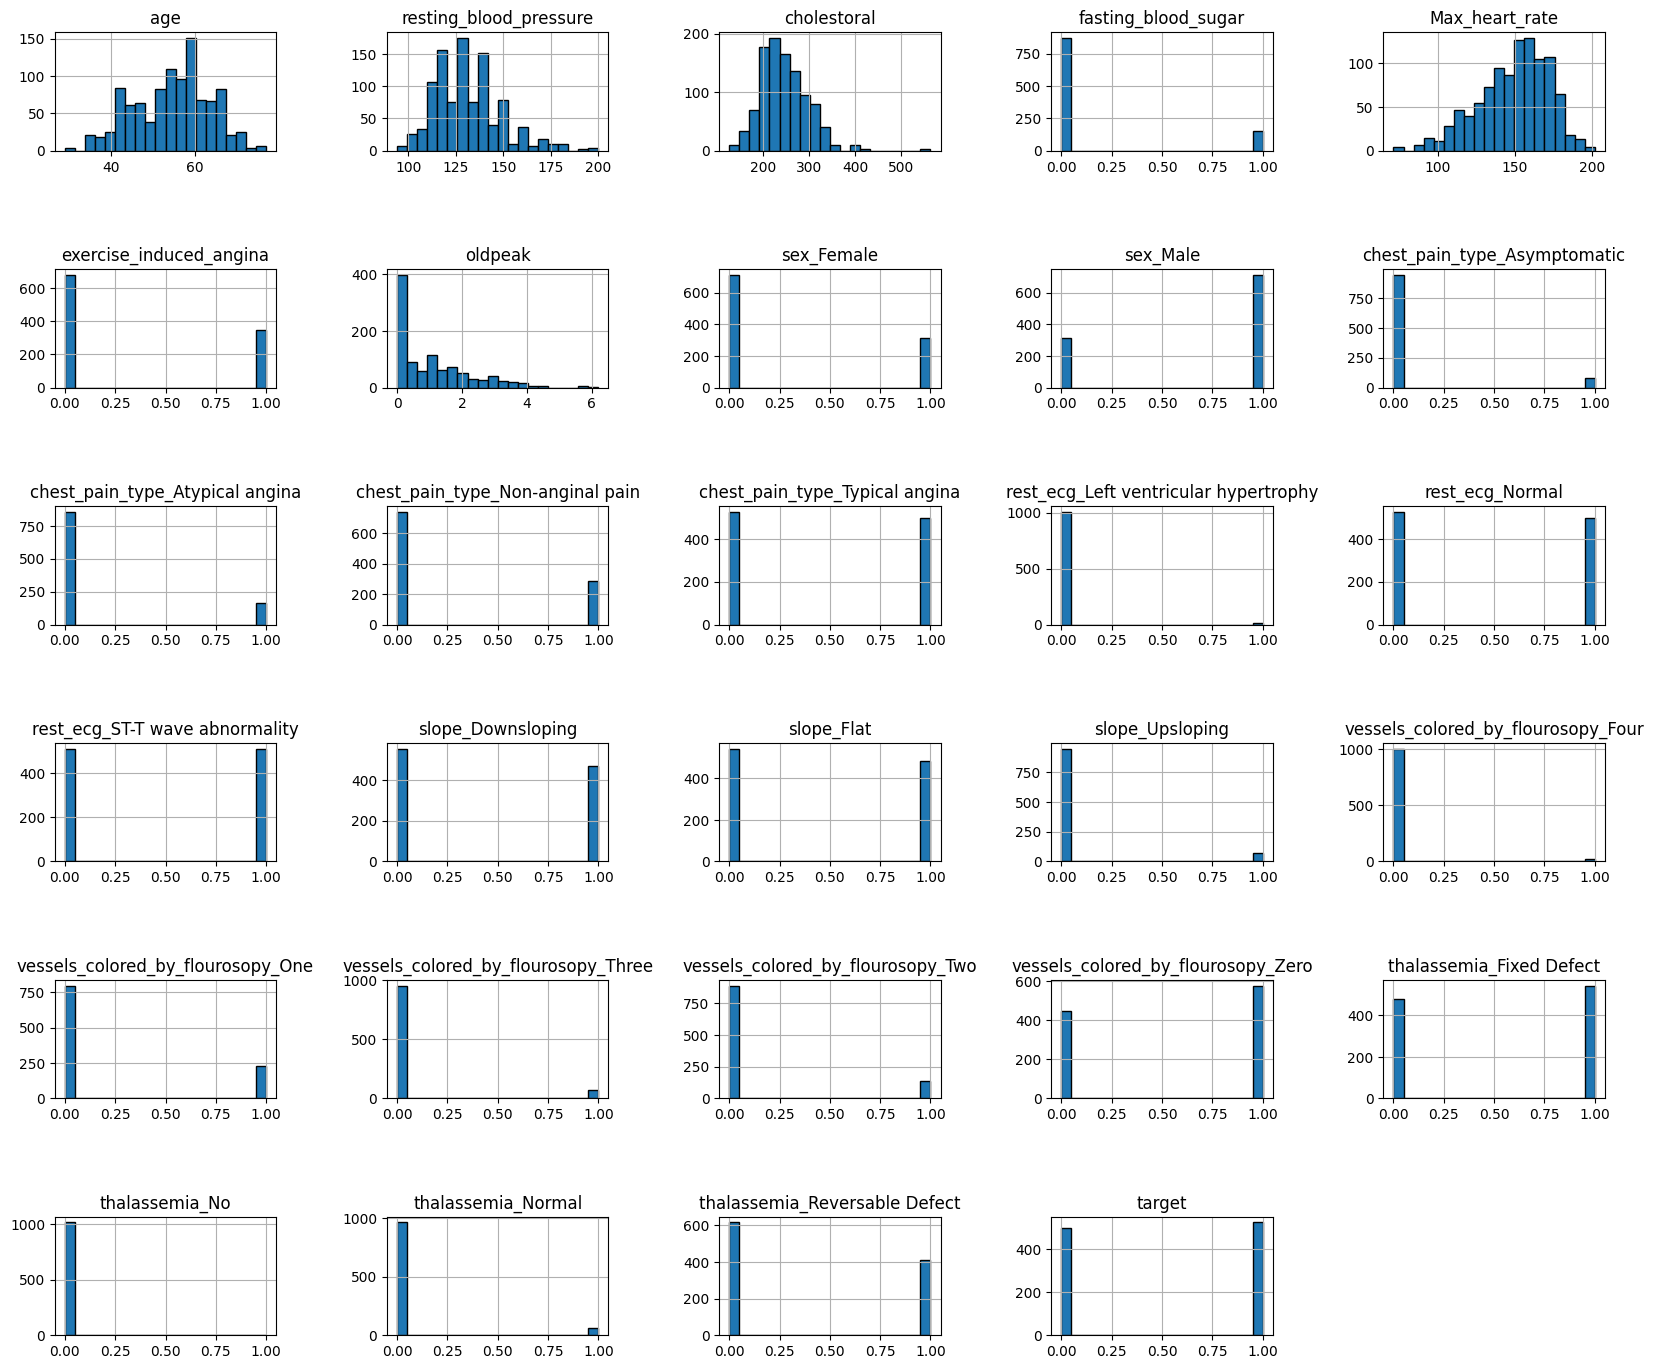

In [ ]:
show_subplots(df_encoded, len(df_encoded.columns))

### 6.2 Subplots: Only shows sub plots where target = 1

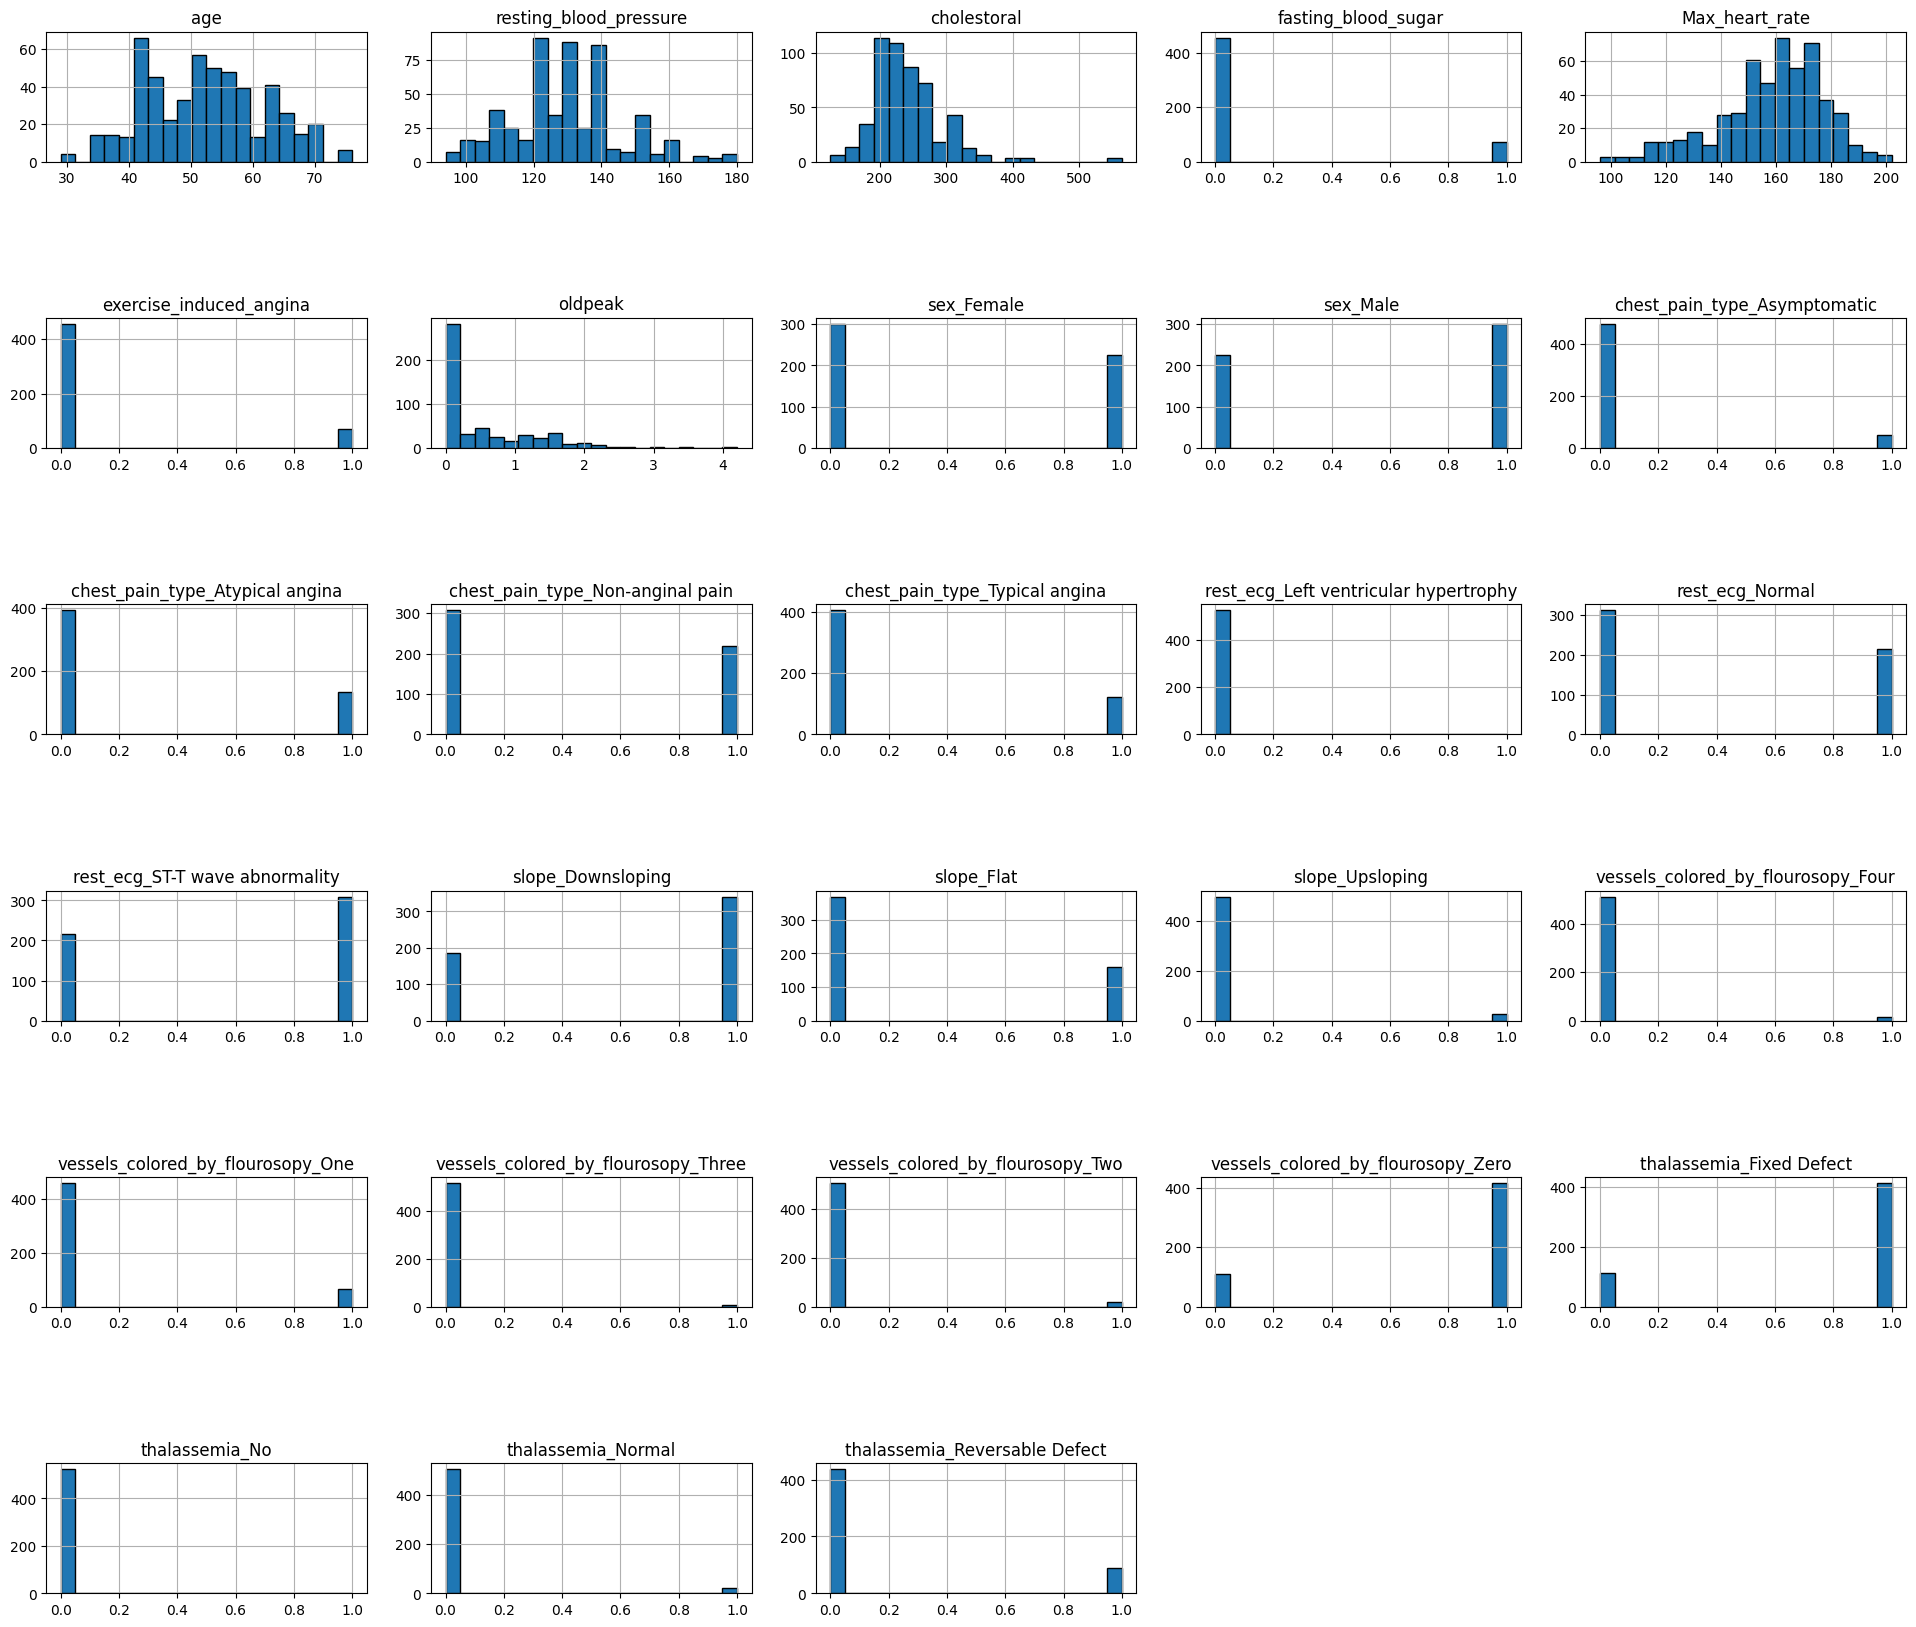

In [ ]:
# filter rows where target is 1
df_outcome_1 = df_encoded[df_encoded['target'] == 1]

# # select columns for plotting
columns = df_encoded.columns[:(len(df_encoded.columns) - 1)]

# plot histograms for selected columns
plt.subplots(figsize=(24, 24))
length = len(columns)
for i, j in itertools.zip_longest(columns, range(length)):
    plt.subplot(int(length/4), 5, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=1.2)
    df_outcome_1[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()

### 6.3 Correlation matrix 

Correlation matrix to visualize the correlation between variables. If there are outliers, they will appear as variables with low correlation with other variables.

In [ ]:
# calculate the correlation matrix
corr_matrix = df_encoded.corr()

### 6.4 Heatmap 

Heatmap for exploring the relationship between variables.

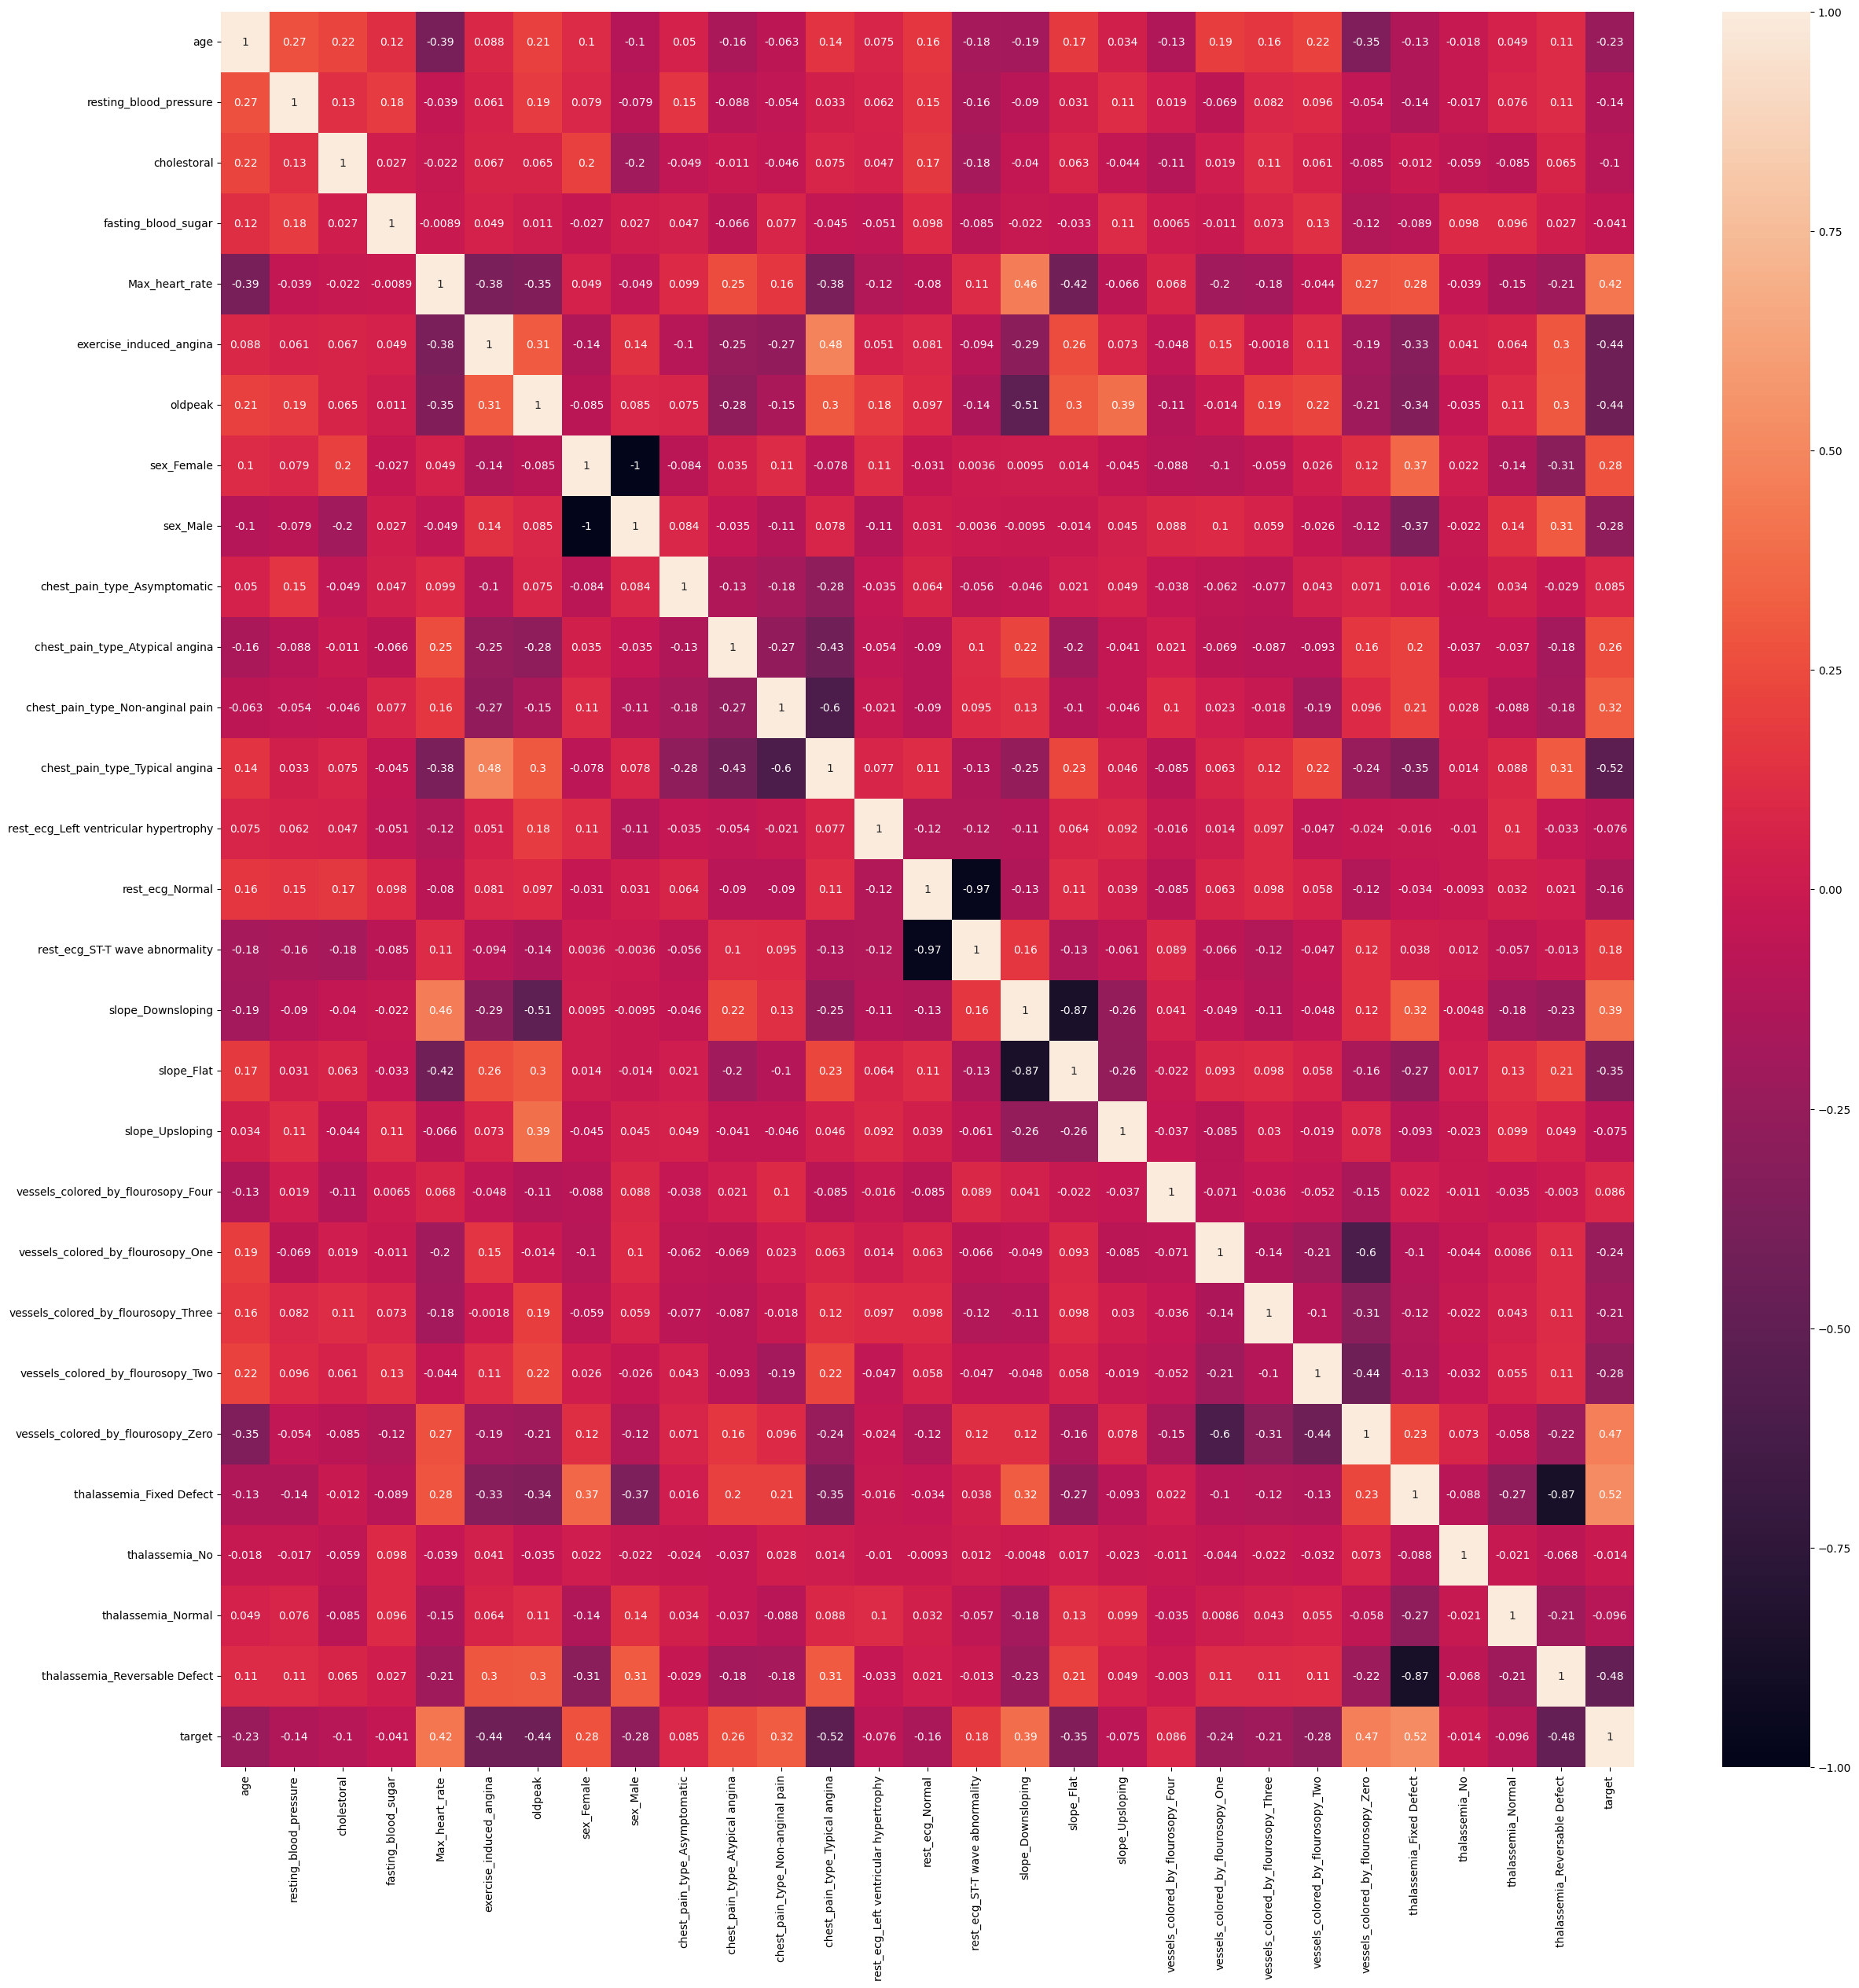

In [ ]:
plt.figure(figsize=(29, 29))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## 7-`LR`. Select and set model

In [ ]:
# Instantiate a logistic regression classifier
# model_lr = LogisticRegression(penalty='l2', C=0.005)
model_lr = LogisticRegression()

## 7-`RF`. Select and set model

In [ ]:
# Instantiate a Random forest classifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5)

## 8-`LR`. Train and test model

In [ ]:
# Training the Logistic regression model using the training data
model_lr.fit(X_train,y_train) 

# Making predictions on the test data using the trained Logistic regression model
y_pred_lr = model_lr.predict(X_test)  

## 8-`RF`. Train and test model

In [ ]:
# Training the Random forest model using the training data
model_rf.fit(X_train,y_train)

# Making predictions on the test data using the trained Random forest model
y_pred_rf = model_rf.predict(X_test)  

## 9. Improve model 

    (Notes of what I have changed)

### 9.1 Logistic Regression

### 9.2 Random forest

## 10-`LR`. Evaluate results

lr = Logistic regression

### 10.1-`LR` Accuracy score 

Accuracy score: Calculates the accuracy of the classifier by comparing its predictions with the true labels

In [ ]:
lr_acc_score = accuracy_score(y_pred_lr, y_test)

print(f'Accuracy score: {lr_acc_score}')

Accuracy score: 0.8048780487804879


### 10.2-`LR` Precision score

Precision score:  measures how often the model is correct when it predicts a positive sample

In [ ]:
lr_pr_score = precision_score(y_pred_lr, y_test)

print(f'Precision score: {lr_pr_score}')

Precision score: 0.8640776699029126


### 10.3-`LR` Recall score

Recall score:  measures how often the model correctly identifies positive samples

In [ ]:
lr_rc_score = recall_score(y_pred_lr, y_test)

print(f'Recall score: {lr_rc_score}')

Recall score: 0.7739130434782608


### 10.4-`LR` Confusion matrix

Confusion matrix to evaluate the accuracy of the Logistic regression

In [ ]:
lr_cm = confusion_matrix(y_test, y_pred_lr)  

print(lr_cm)

[[76 26]
 [14 89]]


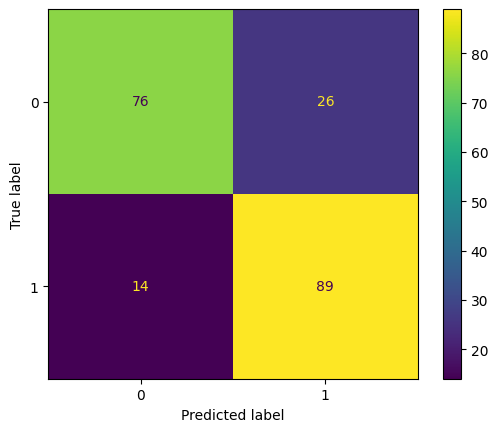

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=model_lr.classes_)
disp.plot() 
plt.show()

Correctly predicted 76 negative cases out of all negative cases with heart diseases.

Correctly predicted 89 positive cases out of all positive cases heart diseases.

The model predicted 14 negative cases but in reality it where 14 positive cases.

The model predicted 26 positive cases but in reality it where 26 negative cases.

## 10-`RF`. Evaluate results

rf = Random forest

### 10.1-`RF`. Accuracy score

Accuracy score: Calculates the accuracy of the classifier by comparing its predictions with the true labels

In [ ]:
rf_acc_score = accuracy_score(y_pred_rf, y_test)

print(f'Accuracy score: {rf_acc_score}')

Accuracy score: 0.8634146341463415


### 10.2-`RF`. Precision score

Precision score:  measures how often the model is correct when it predicts a positive sample

In [ ]:
rf_pr_score = precision_score(y_pred_rf, y_test)

print(f'Precision score: {rf_pr_score}')

Precision score: 0.9320388349514563


### 10.3-`RF`. Recall score

Recall score:  measures how often the model correctly identifies positive samples

In [ ]:
rf_rc_score = recall_score(y_pred_rf, y_test)

print(f'Recall score: {rf_rc_score}')

Recall score: 0.8205128205128205


### 10.4-`RF`. Cross validation

Performing 7-fold cross validation on the Random forest model 

Splitting the data into 7 folds (parts)

In [ ]:
# generate cross-validation scores
cv_scores = cross_val_score(model_rf, X, y, cv=7)

print(f'Scores: {cv_scores}')

print(f'Mean (average) score: {np.mean(cv_scores)}')

# Shows how much the data varies from the mean (average). 
# Small output means model is consistent in all folds.
print(f'Standard deviation: {np.std(cv_scores)}')

Scores: [0.93877551 0.93197279 0.89115646 0.93835616 0.92465753 0.86986301
 0.88356164]
Mean (average) score: 0.911191874009878
Standard deviation: 0.026685598364541624


### 10.5-`RF`. Confusion matrix

Confusion matrix to evaluate the accuracy of the Random forest

In [ ]:
rf_cm = confusion_matrix(y_test, y_pred_rf)  

print(rf_cm)

[[81 21]
 [ 7 96]]


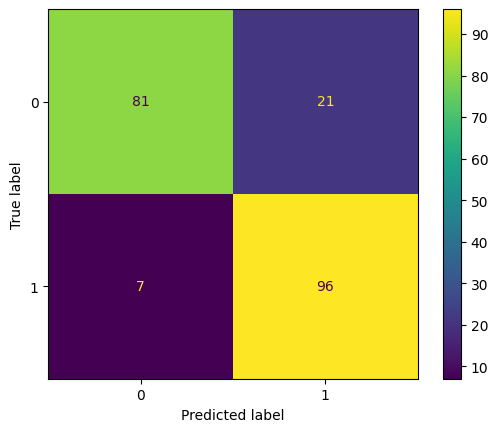

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=model_rf.classes_)
disp.plot() 
plt.show()

... = value (Because every run value varies)

Green: Correctly predicted ... negative cases out of all negative cases with heart diseases.

Yellow: Correctly predicted ... positive cases out of all positive cases heart diseases.

Dark-purple: The model predicted ... negative cases but in reality it where ... positive cases.

Light-purple: The model predicted ... positive cases but in reality it where ... negative cases.

## 10. Conclusion

Based on the evaluation scores, the Random Forest model performed better than the Logistic Regression model for the Heart Disease UCI Dataset in terms of accuracy, precision, and recall. Also removing the penalty and C improved the performance of the Logistic Regression model, so it is not necessary for this specific dataset.

The Random Forest model achieved an accuracy score of 0.8585 and a precision score of 0.9126, and the Logistic Regression model achieved an accuracy score of 0.8048 and a precision score of 0.8641. 

Additionally, the Random Forest model had a higher recall score of 0.8246 compared to the Logistic Regression model's recall score of 0.7739.

For the Logistic Regression model, it correctly predicted 76 negative instances and 89 positive instances, but it made 14 false negative predictions and 26 false positive predictions. For the Random Forest model, it correctly predicted 82 negative instances and 94 positive instances, but it made 9 false negative predictions and 20 false positive predictions.

<span style="color:red;"> Left = Random forest | Right = Logistic Regression </span>

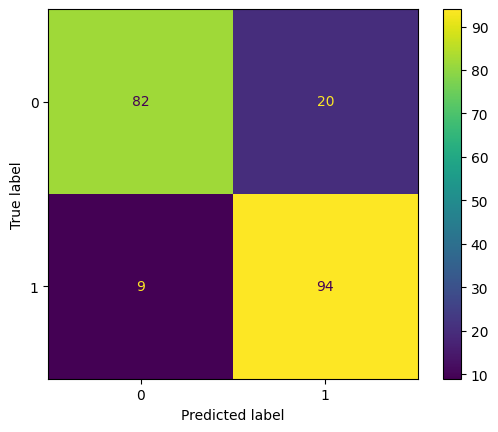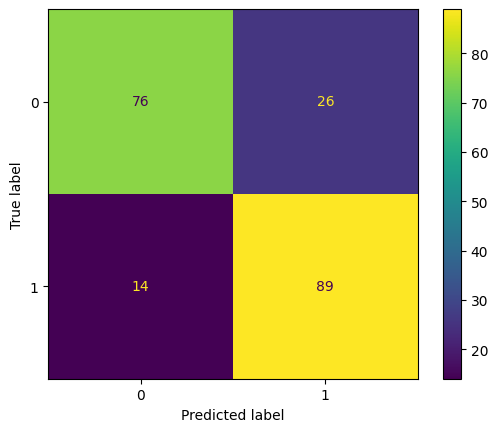

Therefore, it can be concluded that the Random Forest model is a better fit for the Heart Disease UCI Dataset.

Rewrite this in simpler terms